In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
police_killings = pd.read_csv("police_killings.csv", encoding="ISO-8859-1")

print(police_killings.columns)
print(police_killings.head(1))



Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')
                 name age gender raceethnicity     month  day  year  \
0  A'donte Washington  16   Male         Black  February   23  2015   

  streetaddress       city state   ...     share_hispanic  p_income  h_income  \
0  Clearview Ln  Millbrook    AL   ...                5.6     28375   51367.0   

   county_income  comp_income  county_bucket  nat_bucket   pov     urate  \
0          54766     0.937936            3.0         3.0  14.1  0.097686   

   college  
0  0.16851  

[1 rows x 34 columns]


/Users/wislish/anaconda/envs/500lines-crawler/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
race_counts = police_killings.raceethnicity.value_counts()
print (type(race_counts))

<class 'pandas.core.series.Series'>


Index(['White', 'Black', 'Hispanic/Latino', 'Unknown',
       'Asian/Pacific Islander', 'Native American'],
      dtype='object')


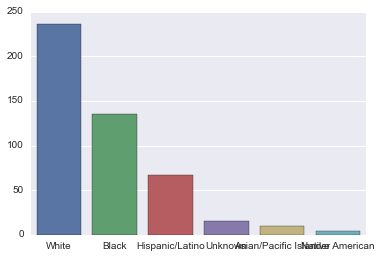

In [3]:
%matplotlib inline
# sns.distplot(race_counts.index,race_counts.values)
print(race_counts.index)
sns.barplot(race_counts.index, race_counts.values)

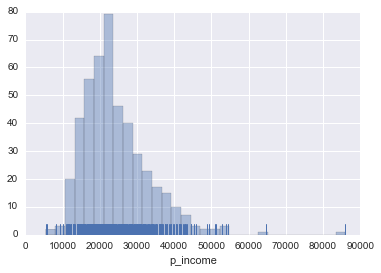

In [4]:
income = police_killings.p_income.loc[police_killings.p_income !='-']
income = income.astype(int)
sns.distplot(income, kde=False, rug=True)

In [5]:
state_pop = pd.read_csv("state_population.csv")
counts = police_killings.state_fp.value_counts()
# print(counts)
states = pd.DataFrame({"STATE":
                      counts.index, "shootings":
                      counts})
states = pd.merge(states, state_pop, on="STATE")
print(states)

    STATE  shootings  SUMLEV REGION DIVISION                  NAME  \
0       6         74      40      4        9            California   
1      48         47      40      3        7                 Texas   
2      12         29      40      3        5               Florida   
3       4         25      40      4        8               Arizona   
4      40         22      40      3        7              Oklahoma   
5      13         16      40      3        5               Georgia   
6      36         13      40      1        2              New York   
7       8         12      40      4        8              Colorado   
8      34         11      40      1        2            New Jersey   
9      53         11      40      4        9            Washington   
10     22         11      40      3        7             Louisiana   
11     17         11      40      2        3              Illinois   
12     39         10      40      2        3                  Ohio   
13     29         10

In [6]:
states['pop_millions'] = states['POPESTIMATE2015'] / 1000000
states['rate'] = states['shootings'] / states['pop_millions']



In [7]:
states.sort(['rate'])
print(states.sort(['rate'])[['NAME','rate','STATE']])
print(states.sort(['rate'],ascending=False).loc[:,['NAME','rate']])

                    NAME      rate  STATE
43           Connecticut  0.278483      9
22          Pennsylvania  0.546768     42
38                  Iowa  0.640226     19
6               New York  0.656705     36
29         Massachusetts  0.735898     25
42         New Hampshire  0.751536     33
45                 Maine  0.752260     23
11              Illinois  0.855366     17
12                  Ohio  0.861073     39
31             Wisconsin  0.866350     55
16              Michigan  0.907023     26
28             Tennessee  0.909050     47
15        North Carolina  0.995738     37
36                Nevada  1.037759     32
18              Virginia  1.073602     51
40         West Virginia  1.084523     54
25             Minnesota  1.092977     27
20               Indiana  1.208518     18
8             New Jersey  1.227951     34
35              Arkansas  1.343091      5
2                Florida  1.430596     12
44  District of Columbia  1.487591     11
9             Washington  1.534095

/Users/wislish/anaconda/envs/500lines-crawler/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
/Users/wislish/anaconda/envs/500lines-crawler/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
/Users/wislish/anaconda/envs/500lines-crawler/lib/python3.4/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [8]:
lowest_rate = states.sort(['rate']).STATE.iloc[0:10]
highest_rate = states.sort(['rate'],ascending=False).STATE.iloc[0:10]
print(lowest_rate)
# print(pk.shape)
pk = police_killings.loc[((police_killings.share_white!='-') &
                         (police_killings.share_black!='-') &
                         (police_killings.share_hispanic!='-')),:]
nounder = ((police_killings.share_white!='-') & (police_killings.share_black!='-') & 
            (police_killings.share_hispanic!='-'))
print(len(nounder))

43     9
22    42
38    19
6     36
29    25
42    33
45    23
11    17
12    39
31    55
Name: STATE, dtype: int64
467


/Users/wislish/anaconda/envs/500lines-crawler/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
/Users/wislish/anaconda/envs/500lines-crawler/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [9]:
# print(pk.describe())
# print(pk.dtypes)
low_murder = pk[pk.state_fp.isin(lowest_rate.values)]
high_murder = pk[pk.state_fp.isin(highest_rate)]

low_murder.describe()
# high_murder[['share_white','share_black','share_hispanic']].describe()

,day,year,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,pop,h_income,county_income,comp_income,county_bucket,nat_bucket,urate,college
count,55.000000,55.0,55.000000,55.000000,55.000000,55.000000,55.000000,5.500000e+01,55.000000,55.000000,55.000000,55.000000,55.000000,53.000000,55.000000,55.000000,55.000000
mean,15.163636,2015.0,41.388989,-80.372303,32.781818,69.254545,241421.200000,3.285131e+10,32851.072727,4153.472727,45410.436364,55037.963636,0.825253,2.301887,2.418182,0.127544,0.206110
std,8.526133,0.0,1.555304,7.024905,11.886330,56.704634,338096.836487,1.187539e+10,11875.547207,1395.466029,21783.762734,12468.570173,0.313287,1.408558,1.300867,0.072674,0.148677
min,1.000000,2015.0,37.176040,-93.609646,9.000000,1.000000,101.000000,9.009184e+09,9009.000000,1271.000000,18833.000000,34388.000000,0.329534,1.000000,1.000000,0.030341,0.026404
25%,7.500000,2015.0,40.610408,-87.859926,21.000000,26.000000,6465.000000,2.107848e+10,21078.000000,3236.500000,31010.000000,46578.500000,0.610756,1.000000,1.000000,0.083995,0.101664
50%,15.000000,2015.0,41.499610,-79.991463,36.000000,49.000000,40300.000000,3.605500e+10,36055.000000,4079.000000,42346.000000,53119.000000,0.777663,2.000000,2.000000,0.109368,0.160842
75%,22.000000,2015.0,42.287520,-73.950021,39.000000,108.000000,412150.000000,3.914627e+10,39146.000000,4923.500000,58303.000000,59206.000000,1.041945,3.000000,4.000000,0.166568,0.257514
max,31.000000,2015.0,46.159878,-68.100007,55.000000,201.000000,970300.000000,5.507902e+10,55079.000000,8222.000000,142500.000000,87763.000000,1.677438,5.000000,5.000000,0.448075,0.744900
